# Neural Networks and Convolutional Neural Networks Essential Training
## LinkedIn Learning Course
This is Bianca Diana Smalbelgher's the practice notebook following the above named course.
The course was created by Jonathan Fernandes

# Introduction to Neural Networks

## Import packages

In [1]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation


In [2]:
from keras.datasets import mnist
from tensorflow.keras.utils import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [5]:
X_train[0].shape

(28, 28)

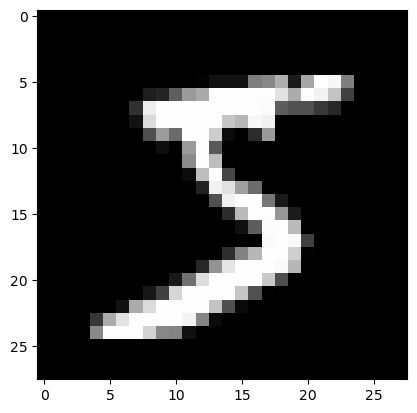

In [6]:
plt.imshow(X_train[0], cmap = 'gray')

In [7]:
y_train[0]

5

## Preprocessing the image data

In [8]:
image_height, image_width = 28, 28

In [9]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)
y_test = to_categorical(y_test, 10)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

## Compile the model

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
784*512+512

401920

In [19]:
512*512+512

262656

In [20]:
512*10+10

5130

## Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1821 - accuracy: 0.9448 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0815 - accuracy: 0.9746 - val_loss: 0.0867 - val_accuracy: 0.9741
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 4/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0896 - val_accuracy: 0.9760
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.1034 - val_accuracy: 0.9749
Epoch 6/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0864 - val_accuracy: 0.9789
Epoch 7/20
1237/1875 [==================>...........] - ETA: 10s - loss: 0.0222 - accuracy: 0.9928

## What is the accuracy of the model?

### Plot the accuracy of the training model

In [ ]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating the model

In [ ]:
score = model.evaluate(X_test, y_test)

In [ ]:
score

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv2D(32, kernel_size = (5, 5), input_shape = (28, 28, 1), padding = 'same', activation = 'relu'))

In [ ]:
cnn.add(MaxPooling2D())

In [ ]:
cnn.add(Conv2D(64, kernel_size = (5, 5), padding = 'same', activation = 'relu'))

In [ ]:
cnn.add(MaxPooling2D())

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(1024, activation = 'relu'))

In [ ]:
cnn.add(Dense(10, activation = 'softmax'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(cnn.summary())

# Image Augmentation
- Check images/sample-train 
- Check images/sample-confirm is empty


In [ ]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.datasets import mnist
from tensorflow.keras.utils import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input

**Check  that sample-confirm is empty**

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

jf_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True
)

## Check on a sample to see the image generators work in the way we expect

In [ ]:
train_generator = train_datagen.flow_from_directory('images/sample-train/',target_size=(150,150), save_to_dir='images/sample-confirm/')

In [ ]:
i=0
for batch in train_datagen.flow_from_directory('images/sample-train/', target_size=(150,150), save_to_dir='images/sample-confirm/'):
    i+=1
    if (i>10):
        break


In [ ]:
j=0
for batch in jf_datagen.flow_from_directory('images/sample-train/', target_size=(150,150), save_to_dir='images/sample-confirm/'):
    j+=1
    if ( j > 10):
        break

## Using VGG16

In [ ]:
import numpy as np
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image

In [ ]:
model = vgg16.VGG16(weights = 'imagenet')

# Not working
Unfortunatelly, the course was created using Azure Notebooks and some code isn't working in (Anaconda) Jupyter Notebooks. I save the following code for future documentation, in case I'll ever need it.

In [ ]:
# img = image.load_img('images/spoon.jpeg', target_size = (224, 224))

In [ ]:
# convet to numpy array
# arr = image.img_to_array(img)
# arr.shape

In [ ]:
# expand dimensions
# arr = np.expand_dims(arr, axis = 0)
# arr.shape

In [ ]:
# processing
# arr = vgg16.preprocess_input(arr)
# arr

In [ ]:
# predict
# preds = model.predict(arr)
# preds

In [ ]:
# predictions for top 5
# vgg16.decode_predictions(preds, top = 5)

# Thank you for taking the time to check my code!